In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df_top = pd.read_excel("TOP_consumers_engine_2024.xlsx",header=None)
print(df_top.head())

df_water = pd.read_excel("Water_consumption_AH_2024.xlsx",header=None)
print(df_water.head())

                                0        1        2       3         4   \
0  Consumption for social purposes      NaN      NaN     NaN       NaN   
1                Engine production      NaN      NaN     NaN       NaN   
2                              NaN     2010     2011    2012      2013   
3                 Grand total (m3)  96569.0  94684.7  143781  163010.1   
4                              NaN      NaN      NaN     NaN       NaN   

         5        6        7        8        9      10       11       12  \
0       NaN      NaN      NaN      NaN      NaN    NaN      NaN      NaN   
1       NaN      NaN      NaN      NaN      NaN    NaN      NaN      NaN   
2      2014     2015     2016     2017     2018   2019     2020     2021   
3  132874.5  89328.8  63148.8  93381.2  77090.2  73667  59631.0  54098.0   
4       NaN      NaN      NaN      NaN      NaN    NaN      NaN      NaN   

        13         14       15  
0      NaN        NaN      NaN  
1      NaN        NaN      NaN  

In [3]:
print(df_top.info())
print(df_water.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       60 non-null     object 
 1   1       57 non-null     object 
 2   2       37 non-null     object 
 3   3       37 non-null     object 
 4   4       37 non-null     object 
 5   5       37 non-null     object 
 6   6       37 non-null     object 
 7   7       37 non-null     object 
 8   8       37 non-null     object 
 9   9       37 non-null     object 
 10  10      37 non-null     object 
 11  11      37 non-null     object 
 12  12      37 non-null     object 
 13  13      39 non-null     object 
 14  14      2 non-null      float64
 15  15      2 non-null      float64
dtypes: float64(2), object(14)
memory usage: 9.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  --

In [4]:
print(df_water.head(10))

                          0                1           2   \
0  Water measurement devices              NaN         NaN   
1         Identification Nr.  Production hall  Short name   
2                        NaN              NaN         NaN   
3                        NaN              NaN         NaN   
4                     8\nMB1              G19     Brunn 1   
5                     9\nMB2              G19     Brunn 2   
6                        MB3              G19   Brunn 1-2   
7                        NaN              G19         NaN   
8                        FB1              G95    Brunn  3   
9                        NaN              G95         NaN   

                                     3                 4         5   \
0                                   NaN               NaN       NaN   
1                        Measuring unit     Type of water  Diameter   
2                                   NaN               NaN       NaN   
3                          Water supply     

In [5]:
start_col = 6  
num_months = df_water.shape[1] - start_col

dates = pd.date_range(start="2023-12-01", periods=num_months, freq="MS")

records = []

for i in range(4, df_water.shape[0]):  
    row = df_water.iloc[i]
    production_hall = row[1]
    short_name = row[2]
    unit = row[3]

    for idx, date in enumerate(dates):
        col_idx = start_col + idx
        if col_idx >= df_water.shape[1]:
            break
        value = row[col_idx]

        if pd.notna(value):
            try:
                records.append({
                    "Production_Hall": production_hall,
                    "Short_Name": short_name,
                    "Unit": unit,
                    "Year": date.year,
                    "Month": date.month,
                    "Consumption_m3": float(value)
                })
            except:
                continue

df_detailed = pd.DataFrame(records)

print("\Detailed measurement point data (first 10 rows):")
print(df_detailed.head(10))


<>:35: SyntaxWarning: invalid escape sequence '\D'
<>:35: SyntaxWarning: invalid escape sequence '\D'
C:\Users\etrai9k\AppData\Local\Temp\ipykernel_13764\748221383.py:35: SyntaxWarning: invalid escape sequence '\D'
  print("\Detailed measurement point data (first 10 rows):")


\Detailed measurement point data (first 10 rows):
  Production_Hall Short_Name              Unit  Year  Month  Consumption_m3
0             G19    Brunn 1  1. Kút/\n1. well  2023     12          5160.1
1             G19    Brunn 1  1. Kút/\n1. well  2024      1          9003.5
2             G19    Brunn 1  1. Kút/\n1. well  2024      2         12273.8
3             G19    Brunn 1  1. Kút/\n1. well  2024      3         11457.6
4             G19    Brunn 1  1. Kút/\n1. well  2024      4         11810.7
5             G19    Brunn 1  1. Kút/\n1. well  2024      5         12028.5
6             G19    Brunn 1  1. Kút/\n1. well  2024      6         14322.0
7             G19    Brunn 1  1. Kút/\n1. well  2024      7         15939.0
8             G19    Brunn 1  1. Kút/\n1. well  2024      8         19017.9
9             G19    Brunn 1  1. Kút/\n1. well  2024      9         22424.6


In [6]:
yearly = df_detailed.groupby("Year")["Consumption_m3"].sum().reset_index()
print(yearly)

top5 = df_detailed.groupby("Short_Name")["Consumption_m3"].sum().sort_values(ascending=False).head(5)
print(top5)


   Year  Consumption_m3
0  2023    1.799371e+07
1  2024    2.312972e+08
2  2025    4.787931e+06
Short_Name
Brunn 3, 4, 5    50316645.5
Spinkler 1       44411499.0
Brunn 4          20951607.6
Brunn  3         18725580.5
pince            12033695.3
Name: Consumption_m3, dtype: float64


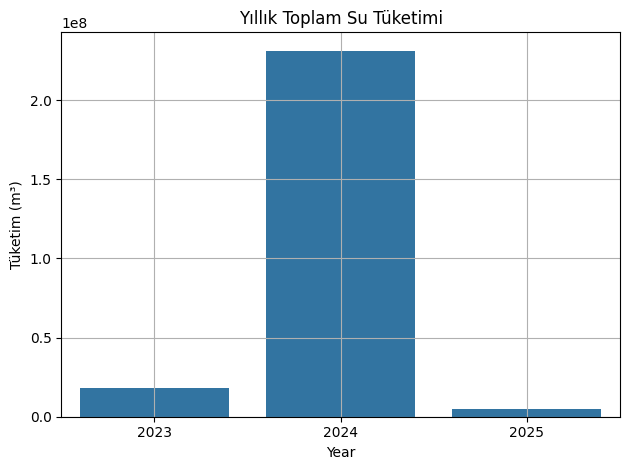

In [7]:
sns.barplot(data=yearly, x="Year", y="Consumption_m3")
plt.title("Yıllık Toplam Su Tüketimi")
plt.ylabel("Tüketim (m³)")
plt.grid(True)
plt.tight_layout()
plt.show()

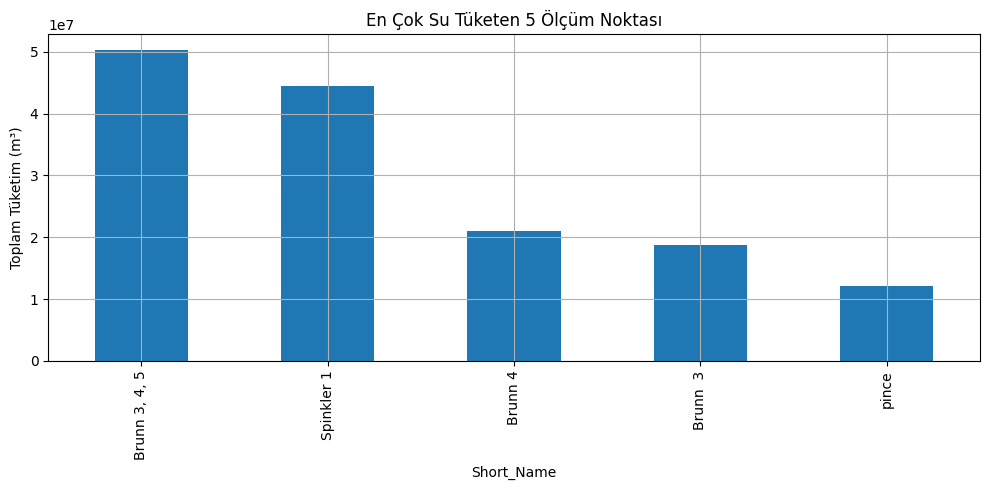

In [8]:
top5.plot(kind="bar", figsize=(10, 5), title="En Çok Su Tüketen 5 Ölçüm Noktası")
plt.ylabel("Toplam Tüketim (m³)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\etrai9k\AppData\Local\Temp\ipykernel_13764\1980568148.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_df, x='Short_Name', y='Total_Consumption', palette='Blues_d')


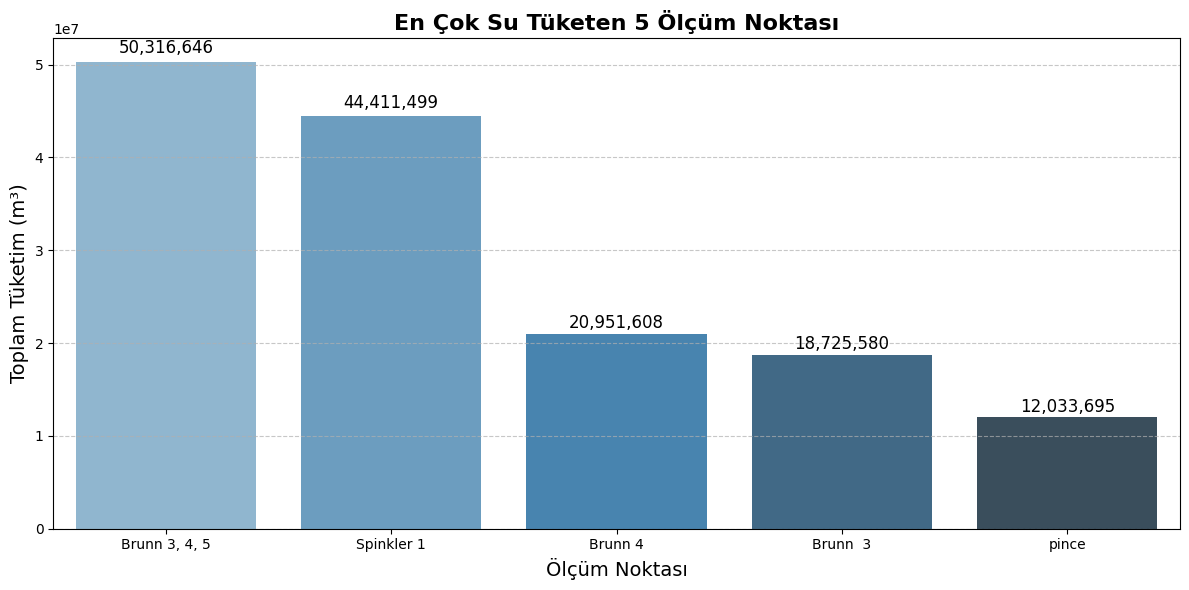

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

top5_df = top5.reset_index()
top5_df.columns = ['Short_Name', 'Total_Consumption']

plt.figure(figsize=(12,6))
sns.barplot(data=top5_df, x='Short_Name', y='Total_Consumption', palette='Blues_d')

plt.title("En Çok Su Tüketen 5 Ölçüm Noktası", fontsize=16, weight='bold')
plt.xlabel("Ölçüm Noktası", fontsize=14)
plt.ylabel("Toplam Tüketim (m³)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, row in top5_df.iterrows():
    plt.text(index, row.Total_Consumption * 1.01, f'{row.Total_Consumption:,.0f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [10]:
import pandas as pd

df_top = pd.read_excel("TOP_consumers_engine_2024.xlsx", header=None)
df_water = pd.read_excel("Water_consumption_AH_2024.xlsx", header=None)

start_col = 6
num_months = df_water.shape[1] - start_col

dates = pd.date_range(start="2023-12-01", periods=num_months, freq="MS")

records = []
for i in range(4, df_water.shape[0]):
    row = df_water.iloc[i]
    production_hall = row[1]
    short_name = row[2]
    unit = row[3]

    for idx, date in enumerate(dates):
        col_idx = start_col + idx
        if col_idx >= df_water.shape[1]:
            break
        value = row[col_idx]
        if pd.notna(value):
            try:
                records.append({
                    "Production_Hall": str(production_hall).strip(),
                    "Short_Name": str(short_name).strip(),
                    "Unit": str(unit).strip(),
                    "Year": date.year,
                    "Month": date.month,
                    "Consumption_m3": float(value)
                })
            except:
                continue

df_detailed = pd.DataFrame(records)
df_detailed.head()


,Production_Hall,Short_Name,Unit,Year,Month,Consumption_m3
0,G19,Brunn 1,1. Kút/\n1. well,2023,12,5160.1
1,G19,Brunn 1,1. Kút/\n1. well,2024,1,9003.5
2,G19,Brunn 1,1. Kút/\n1. well,2024,2,12273.8
3,G19,Brunn 1,1. Kút/\n1. well,2024,3,11457.6
4,G19,Brunn 1,1. Kút/\n1. well,2024,4,11810.7


C:\Users\etrai9k\AppData\Local\Temp\ipykernel_13764\2275771412.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly, x="Year", y="Consumption_m3", palette="Blues_d")


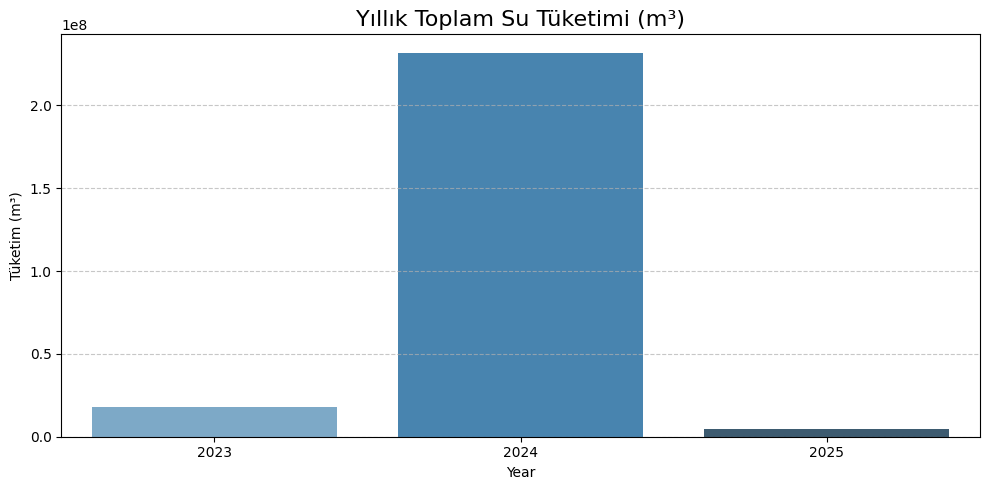

In [11]:
yearly = df_detailed.groupby("Year")["Consumption_m3"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=yearly, x="Year", y="Consumption_m3", palette="Blues_d")
plt.title("Yıllık Toplam Su Tüketimi (m³)", fontsize=16)
plt.ylabel("Tüketim (m³)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


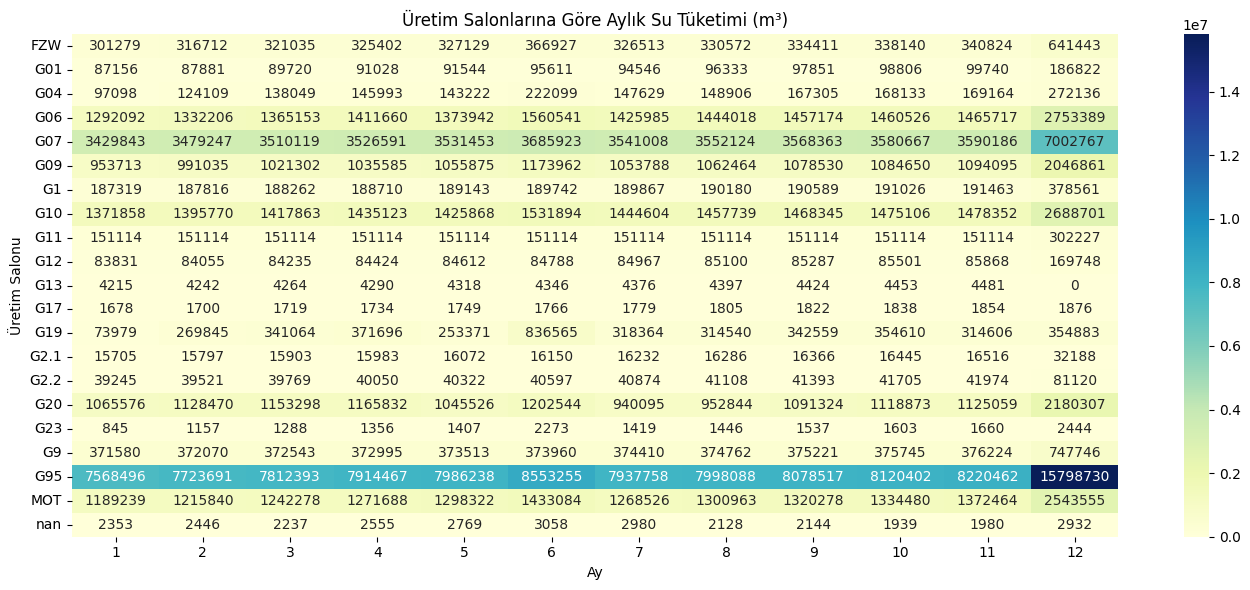

In [12]:
pivot_hall_month = df_detailed.pivot_table(
    index='Production_Hall',
    columns='Month',
    values='Consumption_m3',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(14,6))
sns.heatmap(pivot_hall_month, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Üretim Salonlarına Göre Aylık Su Tüketimi (m³)")
plt.xlabel("Ay")
plt.ylabel("Üretim Salonu")
plt.tight_layout()
plt.show()


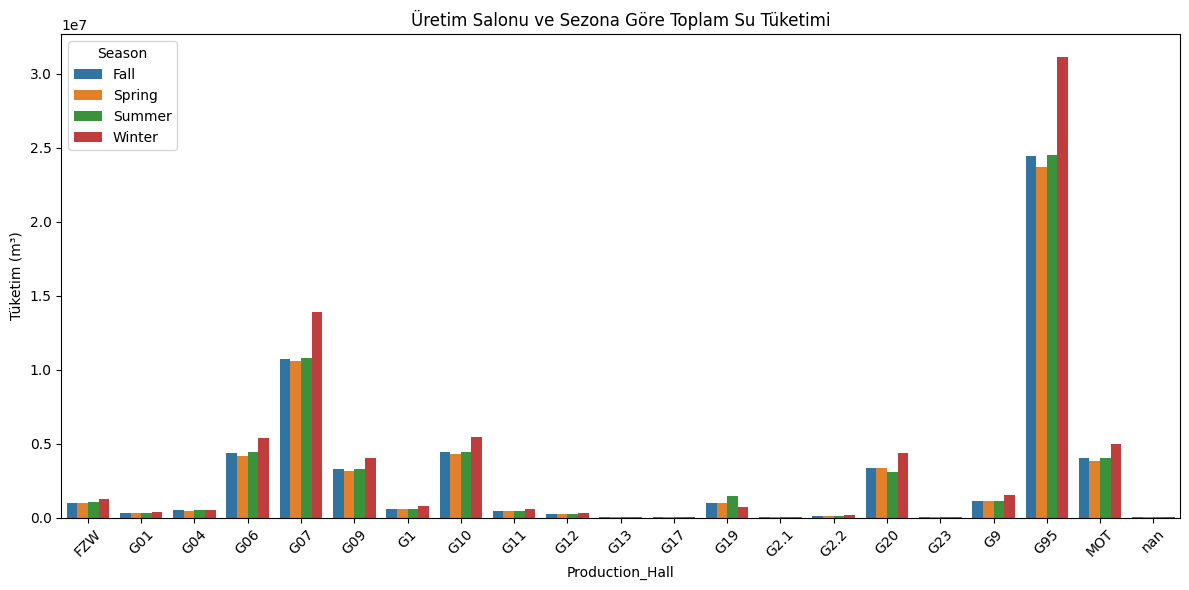

In [13]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_detailed["Season"] = df_detailed["Month"].apply(get_season)

seasonal_hall = df_detailed.groupby(["Production_Hall", "Season"])["Consumption_m3"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=seasonal_hall, x='Production_Hall', y='Consumption_m3', hue='Season')
plt.title("Üretim Salonu ve Sezona Göre Toplam Su Tüketimi")
plt.xticks(rotation=45)
plt.ylabel("Tüketim (m³)")
plt.tight_layout()
plt.show()


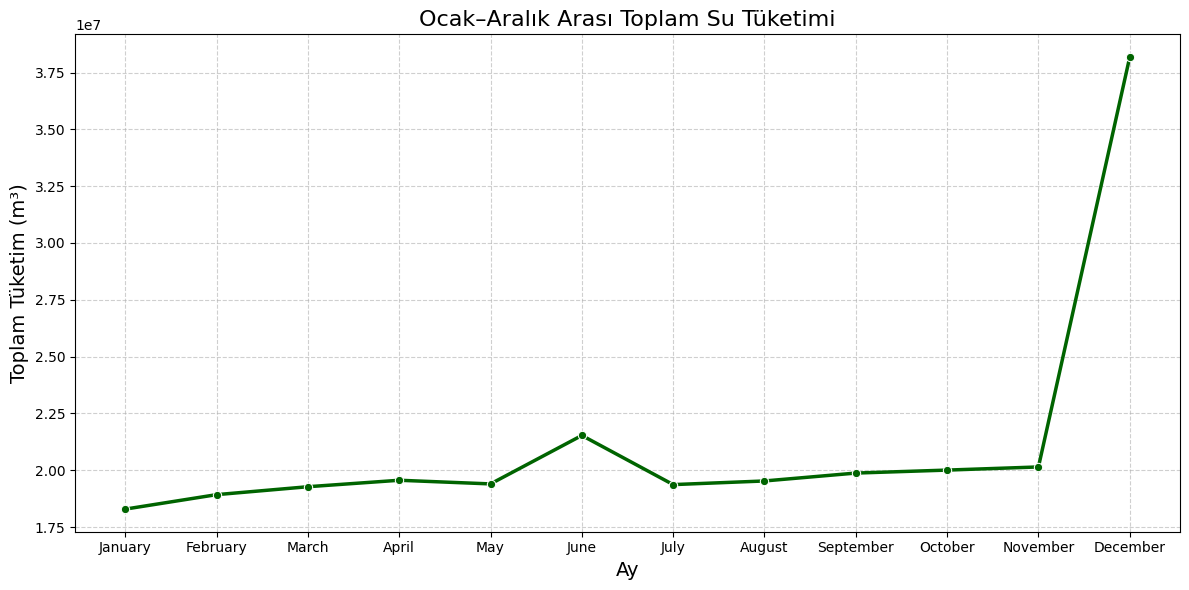

In [14]:
aylar = ["January", "February", "March", "April", "May", "June",
         "July", "August", "September", "October", "November", "December"]

monthly = df_detailed.groupby("Month")["Consumption_m3"].sum().reindex(range(1,13)).reset_index()
monthly.columns = ["Month", "Consumption_m3"]
monthly["Month_Name"] = aylar  

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly, x="Month_Name", y="Consumption_m3", marker="o", linewidth=2.5, color="darkgreen")

plt.title("Ocak–Aralık Arası Toplam Su Tüketimi", fontsize=16)
plt.xlabel("Ay", fontsize=14)
plt.ylabel("Toplam Tüketim (m³)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


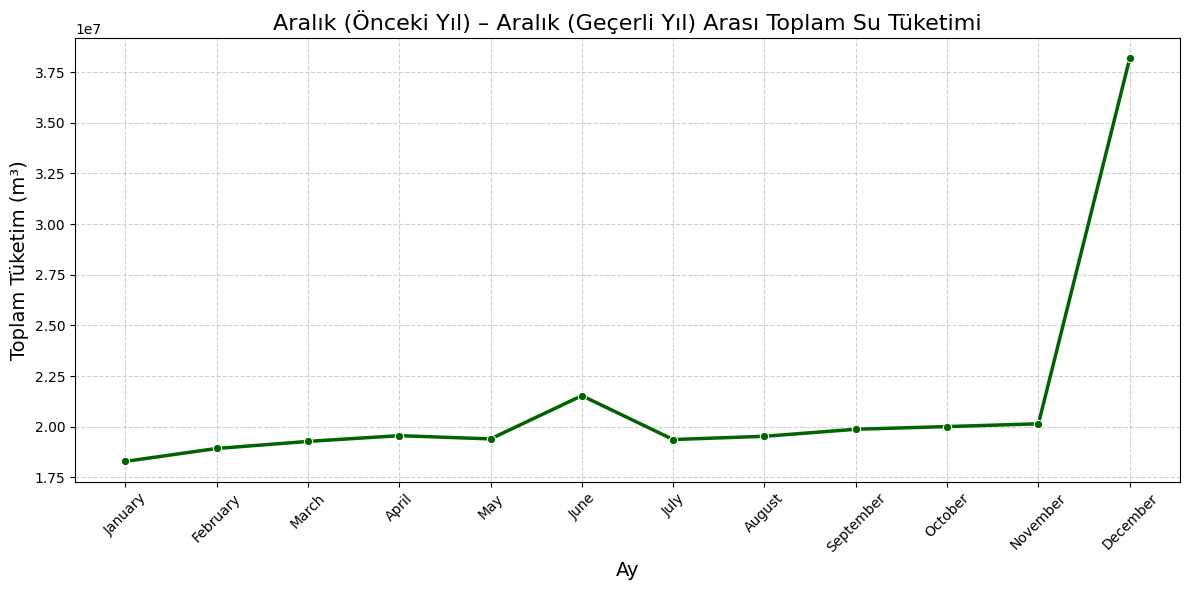

In [15]:
aylar = ["December_prev", "January", "February", "March", "April", "May",
         "June", "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly, x="Month_Name", y="Consumption_m3", marker="o", linewidth=2.5, color="darkgreen")

plt.title("Aralık (Önceki Yıl) – Aralık (Geçerli Yıl) Arası Toplam Su Tüketimi", fontsize=16)
plt.xlabel("Ay", fontsize=14)
plt.ylabel("Toplam Tüketim (m³)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
